In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# dataset ya mergeado entre MDP, 171k y 1.2M
df = pd.read_csv("/content/drive/MyDrive/2024-1/RecSys/merged.csv")
# dataset 171k
df_171k = pd.read_csv("/content/drive/MyDrive/2024-1/RecSys/data.csv")
# dataset 1.2M
df_12m = pd.read_csv("/content/drive/MyDrive/2024-1/RecSys/tracks_features.csv")

El dataset 171k tiene 170653 filas

In [10]:
len(df_171k)

170653

El dataset 1.2M tiene 1204025 filas

In [11]:
len(df_12m)

1204025

Y el dataframe mergeado tiene 188319 filas

In [9]:
len(df)

188319

Echemos un vistazo a los primeros registros de los 3 datasets

In [3]:
df_171k.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [19]:
df_12m.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


In [8]:
# selecconamos las columnas solo con datos, puesto que desde el csv se repite la columna de id
df = df[['artist_name', 'track_uri', 'artist_uri',
       'track_name', 'album_uri', 'duration_ms_x', 'album_name', 'valence',
       'year', 'acousticness', 'artists', 'danceability', 'duration_ms_y',
       'energy', 'explicit', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'name', 'popularity', 'release_date', 'speechiness',
       'tempo', 'album', 'album_id', 'artist_ids', 'track_number',
       'disc_number', 'time_signature', 'playlist_id']]
pd.set_option('display.max_columns', None)
df.head()

,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,valence,year,acousticness,artists,danceability,duration_ms_y,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,album,album_id,artist_ids,track_number,disc_number,time_signature,playlist_id
0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.810,2005,0.0311,"['Missy Elliott', 'Ciara', 'Fatman Scoop']",0.904,226864,0.813,1,0UaMYEvWZi0ZqiDOoHU3YI,0.006970,4,0.0471,-7.105,0,Lose Control (feat. Ciara & Fat Man Scoop),67.0,2005-07-04,0.121,125.461,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Britney Spears,6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,0.924,2003,0.0249,['Britney Spears'],0.774,198800,0.838,0,6I9VzXrHxO9rA9A5euc8Ak,0.025000,5,0.2420,-3.914,0,Toxic,80.0,2003-11-13,0.114,143.040,NaN,NaN,NaN,NaN,NaN,NaN,0
2,Justin Timberlake,1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,0.818,2002,0.2020,['Justin Timberlake'],0.891,267267,0.714,0,1AWQoqb9bSvzTjaLralEkT,0.000234,4,0.0521,-6.055,0,Rock Your Body,72.0,2002-11-04,0.140,100.972,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Usher,68vgtRHr7iZHpzGpon6Jlo,spotify:artist:23zg3TcAtWQy7J6upgbUnj,My Boo,spotify:album:1RM6MGv6bcl6NrAG8PGoZk,223440,Confessions,0.676,2004,0.2570,"['Usher', 'Alicia Keys']",0.662,223440,0.507,0,68vgtRHr7iZHpzGpon6Jlo,0.000000,5,0.0465,-8.238,1,My Boo,80.0,2004-03-23,0.118,86.412,NaN,NaN,NaN,NaN,NaN,NaN,0
4,The Pussycat Dolls,3BxWKCI06eQ5Od8TY2JBeA,spotify:artist:6wPhSqRtPu1UhRCDX5yaDJ,Buttons,spotify:album:5x8e8UcCeOgrOzSnDGuPye,225560,PCD,0.408,2005,0.1780,['The Pussycat Dolls'],0.570,225560,0.821,0,3BxWKCI06eQ5Od8TY2JBeA,0.000000,2,0.2890,-4.380,1,Buttons,65.0,2005-01-01,0.267,210.857,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
# veamos información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188319 entries, 0 to 188318
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artist_name       188319 non-null  object 
 1   track_uri         188319 non-null  object 
 2   artist_uri        188319 non-null  object 
 3   track_name        188319 non-null  object 
 4   album_uri         188319 non-null  object 
 5   duration_ms_x     188319 non-null  int64  
 6   album_name        188319 non-null  object 
 7   valence           188319 non-null  float64
 8   year              188319 non-null  int64  
 9   acousticness      188319 non-null  float64
 10  artists           188319 non-null  object 
 11  danceability      188319 non-null  float64
 12  duration_ms_y     188319 non-null  int64  
 13  energy            188319 non-null  float64
 14  explicit          188319 non-null  int64  
 15  id                188319 non-null  object 
 16  instrumentalness  18

El dataset mergeado contiene las siguientes 12 variables que escriben la sonoridad de las canciones:

- valence
- acousticness
- danceability
- energy
- explicit (categórica binaria)
- instrumentalness
- key (categórica)
- liveness
- loudness
- mode (categórica)
- speechiness
- tempo

Veamos un extracto del dataset solo con estas columnas para explorar sus valores

In [15]:
df[['valence','acousticness','danceability','energy','explicit','instrumentalness','key','liveness','loudness','mode','speechiness','tempo']]

,valence,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
0,0.810,0.0311,0.904,0.813,1,0.006970,4,0.0471,-7.105,0,0.1210,125.461
1,0.924,0.0249,0.774,0.838,0,0.025000,5,0.2420,-3.914,0,0.1140,143.040
2,0.818,0.2020,0.891,0.714,0,0.000234,4,0.0521,-6.055,0,0.1400,100.972
3,0.676,0.2570,0.662,0.507,0,0.000000,5,0.0465,-8.238,1,0.1180,86.412
4,0.408,0.1780,0.570,0.821,0,0.000000,2,0.2890,-4.380,1,0.2670,210.857
...,...,...,...,...,...,...,...,...,...,...,...,...
188314,0.860,0.9330,0.670,0.236,0,0.132000,1,0.1280,-14.292,1,0.0346,143.936
188315,0.316,0.6990,0.488,0.404,0,0.000000,2,0.1500,-9.723,1,0.0289,145.846
188316,0.949,0.1280,0.534,0.565,0,0.000015,4,0.0816,-4.121,1,0.0346,152.991
188317,0.787,0.0751,0.658,0.655,0,0.000311,5,0.2070,-7.292,1,0.0286,126.202


La forma de calcular estos valores no es fácilmente interpretable (a excepción de las categóricas, donde explicit es binario representando si una canción contiene contenido explícito o no y key y mode representan los tonos y los modos musicales de cada canción), y obedecen a una metodología interna de Spotify para ser calculadas.

In [14]:
# describir estadísticamente el dataset
df.describe(include='all')

,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,valence,year,acousticness,artists,danceability,duration_ms_y,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,album,album_id,artist_ids,track_number,disc_number,time_signature,playlist_id
count,188319,188319,188319,188319,188319,1.883190e+05,188319,188319.000000,188319.000000,188319.000000,188319,188319.00000,1.883190e+05,188319.000000,188319.000000,188319,188319.000000,188319.000000,188319.000000,188319.000000,188319.000000,188319,67290.000000,188319,188319.000000,188319.000000,121029,121029,121029,121029.000000,121029.000000,121029.000000,188319.000000
unique,25369,188319,25483,152693,47263,NaN,43833,NaN,NaN,NaN,40182,NaN,NaN,NaN,NaN,188319,NaN,NaN,NaN,NaN,NaN,153705,NaN,9285,NaN,NaN,24848,25941,28045,NaN,NaN,NaN,NaN
top,Vitamin String Quartet,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:6MERXsiRbur2oJZFgYRDKz,Intro,spotify:album:58kign3A2LFAaj0hhTqRXH,NaN,Greatest Hits,NaN,NaN,NaN,['Vitamin String Quartet'],NaN,NaN,NaN,NaN,0UaMYEvWZi0ZqiDOoHU3YI,NaN,NaN,NaN,NaN,NaN,Intro,NaN,2006-01-01,NaN,NaN,Greatest Hits,3O7z4kPJ3LlowdWvyeHWpS,['6MERXsiRbur2oJZFgYRDKz'],NaN,NaN,NaN,NaN
freq,874,1,874,122,101,NaN,385,NaN,NaN,NaN,874,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,122,NaN,1303,NaN,NaN,170,50,873,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.463779e+05,NaN,0.477239,1998.569183,0.395956,NaN,0.52359,2.464065e+05,0.548162,0.079424,NaN,0.204057,5.214625,0.208586,-10.527771,0.690260,NaN,40.079031,NaN,0.080143,118.923566,NaN,NaN,NaN,7.047501,1.040486,3.859298,492.652335
std,NaN,NaN,NaN,NaN,NaN,1.296113e+05,NaN,0.269351,16.713913,0.360731,NaN,0.18406,1.296671e+05,0.273845,0.270400,NaN,0.339630,3.538793,0.191605,5.841354,0.462388,NaN,15.414222,NaN,0.103969,30.547024,NaN,NaN,NaN,5.281213,0.239490,0.503015,290.119725
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,1909.000000,0.000000,NaN,0.00000,3.344000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,1.832000e+05,NaN,0.249500,1990.000000,0.037500,NaN,0.39600,1.832120e+05,0.328000,0.000000,NaN,0.000001,2.000000,0.095800,-13.175000,0.000000,NaN,29.000000,NaN,0.034200,95.067000,NaN,NaN,NaN,3.000000,1.000000,4.000000,240.000000
50%,NaN,NaN,NaN,NaN,NaN,2.274930e+05,NaN,0.472000,2004.000000,0.295000,NaN,0.53400,2.275000e+05,0.569000,0.000000,NaN,0.000558,5.000000,0.127000,-9.125000,1.000000,NaN,40.000000,NaN,0.043700,117.151000,NaN,NaN,NaN,6.000000,1.000000,4.000000,491.000000
75%,NaN,NaN,NaN,NaN,NaN,2.806000e+05,NaN,0.699000,2011.000000,0.757000,NaN,0.65800,2.806230e+05,0.782000,0.000000,NaN,0.295000,8.000000,0.257000,-6.371000,1.000000,NaN,51.000000,NaN,0.072100,138.071000,NaN,NaN,NaN,10.000000,1.000000,4.000000,745.000000


### Datos faltantes

artist_name              0
track_uri                0
artist_uri               0
track_name               0
album_uri                0
duration_ms_x            0
album_name               0
valence                  0
year                     0
acousticness             0
artists                  0
danceability             0
duration_ms_y            0
energy                   0
explicit                 0
id                       0
instrumentalness         0
key                      0
liveness                 0
loudness                 0
mode                     0
name                     0
popularity          121029
release_date             0
speechiness              0
tempo                    0
album                67290
album_id             67290
artist_ids           67290
track_number         67290
disc_number          67290
time_signature       67290
playlist_id              0
dtype: int64


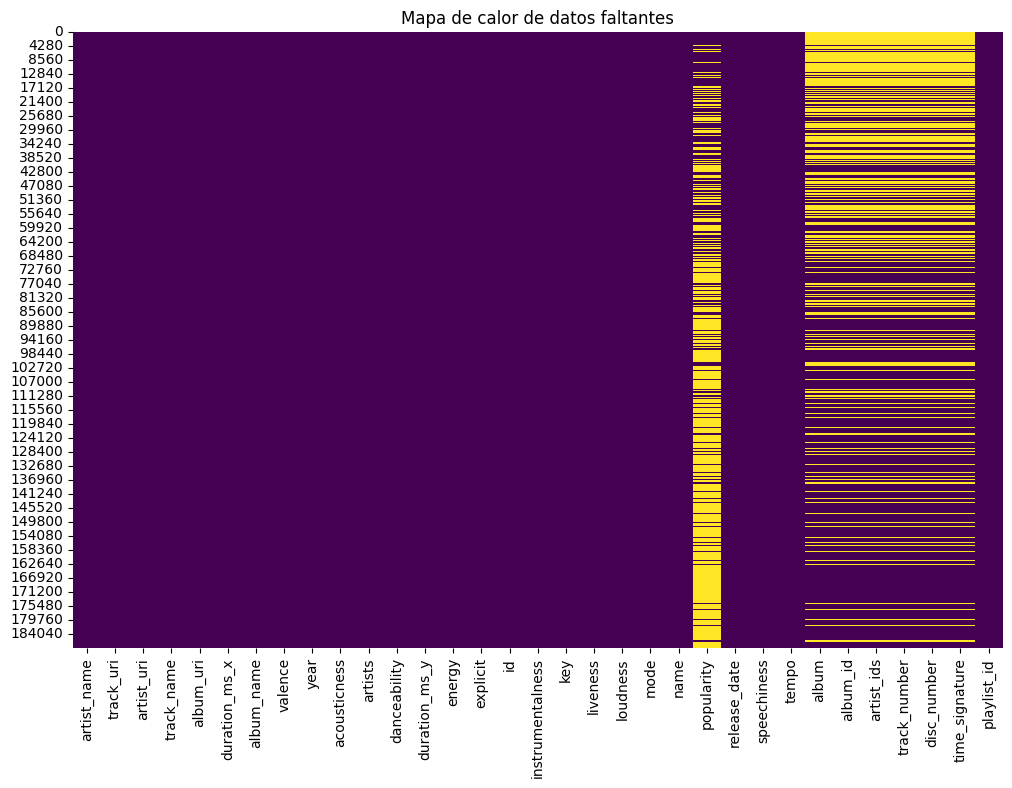

In [16]:
print(df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de datos faltantes')
plt.show()


A la hora de mirar las features con datos faltantes nos damos cuenta que en la columna de poularidad, que es una métrica desarrollada internamente por Spotify, cuenta con muchos de ellos, al igual que las columnas relacionadas a los álbumes y los artistas de cada canción. Afortunadamente, nuestro modelo se basará en la presencia de las canciones en cada playlist y en las variables que describen su sonoridad, por lo que la ausencia de estos datos no será relevante para nuestro trabajo.

### Distribución de variables

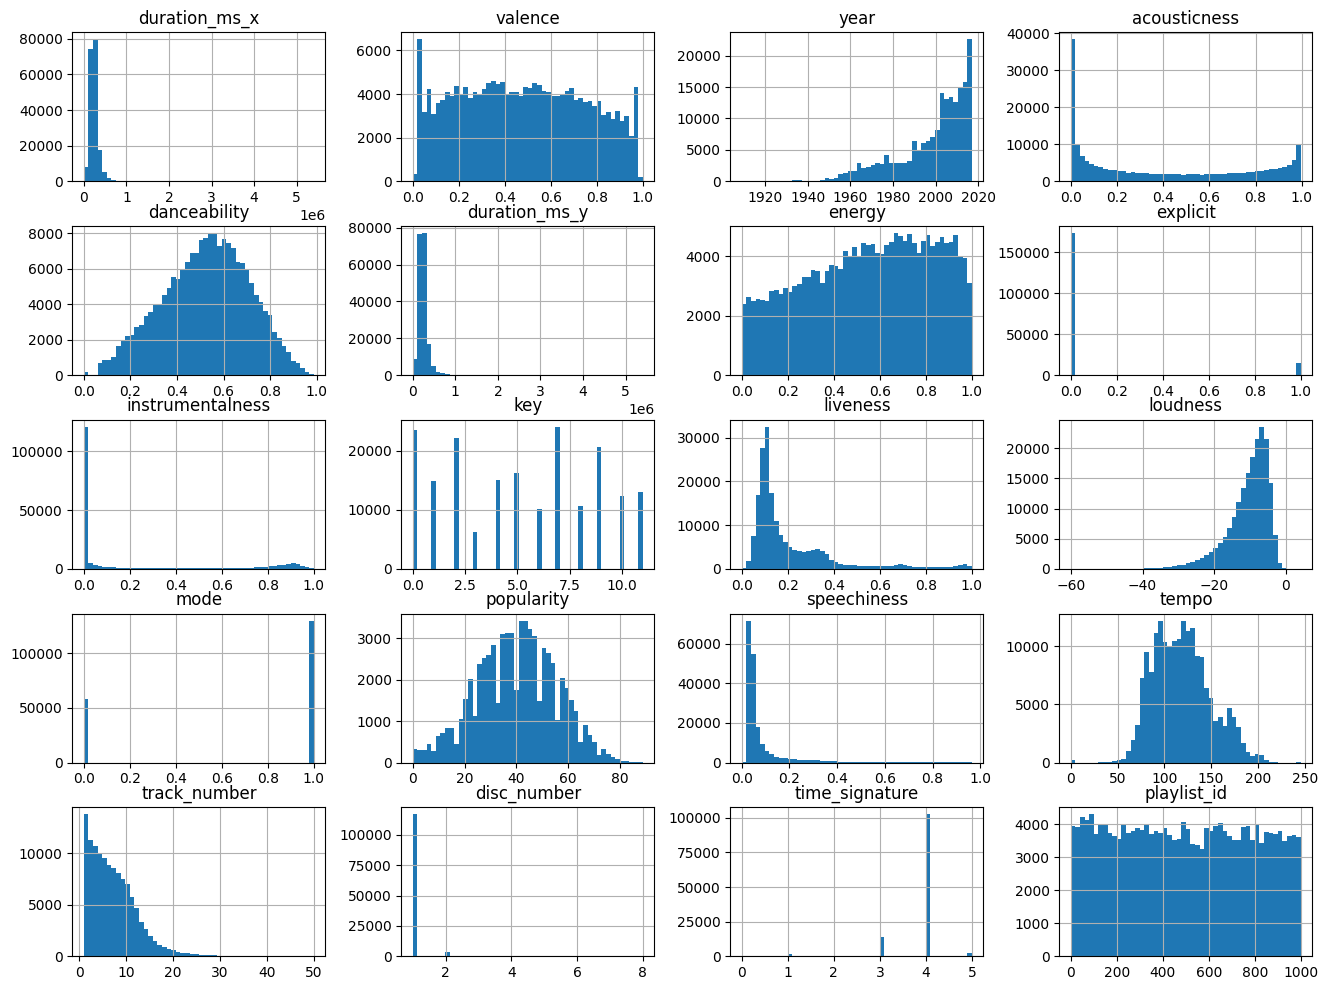

In [20]:
# Histograma de variables numéricas
df.hist(figsize=(16, 12), bins=50)
plt.show()